# **What is a phishing attack?**
* Phishing is a type of social engineering attack often used to steal user data, including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, dupes a victim into opening an email, instant message, or text message.


# **Importing some useful libraries**


In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix
import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
import plotly.express as px
import sklearn
import time # calculate time

# **Loading the dataset**

In [2]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [3]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [5]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [6]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

In [7]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

In [8]:
#visualizing target_col
fig = px.bar(label_counts, x=label_counts.index, y=label_counts.Label)
fig.show()

# **Preprocessing**
* **Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.**

In [9]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import nltk
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

# **Regular ExpressionTokenizer**
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [11]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only

In [12]:
phish_data.URL[2]

'serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/'

In [13]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[2]) # using third row

['serviciosbys',
 'com',
 'paypal',
 'cgi',
 'bin',
 'get',
 'into',
 'herf',
 'secure',
 'dispatch',
 'rzr',
 'dsf',
 'href',
 'href',
 'href',
 'secure',
 'center',
 'update',
 'limit',
 'seccure',
 'd',
 'a',
 'ff',
 'c',
 'a',
 'e',
 'a',
 'c',
 'fd']

In [14]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 4.37565216400003 sec


In [15]:
phish_data.sample(10)

,URL,Label,text_tokenized
315838,docstoc.com/docs/30799319/Canadian-Union-of-Pu...,good,"[docstoc, com, docs, Canadian, Union, of, Publ..."
159738,collegefootball.rivals.com/cviewplayer.asp?Pla...,good,"[collegefootball, rivals, com, cviewplayer, as..."
216646,mp3bear.com/?q=sam+roberts,good,"[mp, bear, com, q, sam, roberts]"
434807,speakers.ca/evanshen_terry.html,good,"[speakers, ca, evanshen, terry, html]"
142001,americanprecspring.com/,good,"[americanprecspring, com]"
443225,theaprilmaze.com/,good,"[theaprilmaze, com]"
267062,absoluteastronomy.com/topics/Alexander_Morris,good,"[absoluteastronomy, com, topics, Alexander, Mo..."
262404,wtso.com/,good,"[wtso, com]"
64299,blazingfire.net/Home.html,good,"[blazingfire, net, Home, html]"
396625,mylife.com/diafinley,good,"[mylife, com, diafinley]"


# **SnowballStemmer**
* Snowball is a small string processing language, gives root words

In [16]:
from nltk.stem.snowball import SnowballStemmer # stemmes words

In [17]:
stemmer = SnowballStemmer("english") # choose a language

In [18]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 69.81991022800003 sec


In [19]:
phish_data.head(10)

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."
5,smilesvoegol.servebbs.org/voegol.php,bad,"[smilesvoegol, servebbs, org, voegol, php]","[smilesvoegol, servebb, org, voegol, php]"
6,premierpaymentprocessing.com/includes/boleto-2...,bad,"[premierpaymentprocessing, com, includes, bole...","[premierpaymentprocess, com, includ, boleto, v..."
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad,"[myxxxcollection, com, v, js, jih, bpd, com, d...","[myxxxcollect, com, v, js, jih, bpd, com, do, ..."
8,super1000.info/docs,bad,"[super, info, docs]","[super, info, doc]"
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad,"[horizonsgallery, com, js, bin, ssl, id, www, ...","[horizonsgalleri, com, js, bin, ssl, id, www, ..."


## Join word

In [20]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.28439191600000413 sec


In [21]:
phish_data.head(10)

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...
5,smilesvoegol.servebbs.org/voegol.php,bad,"[smilesvoegol, servebbs, org, voegol, php]","[smilesvoegol, servebb, org, voegol, php]",smilesvoegol servebb org voegol php
6,premierpaymentprocessing.com/includes/boleto-2...,bad,"[premierpaymentprocessing, com, includes, bole...","[premierpaymentprocess, com, includ, boleto, v...",premierpaymentprocess com includ boleto via php
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad,"[myxxxcollection, com, v, js, jih, bpd, com, d...","[myxxxcollect, com, v, js, jih, bpd, com, do, ...",myxxxcollect com v js jih bpd com do do l popu...
8,super1000.info/docs,bad,"[super, info, docs]","[super, info, doc]",super info doc
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad,"[horizonsgallery, com, js, bin, ssl, id, www, ...","[horizonsgalleri, com, js, bin, ssl, id, www, ...",horizonsgalleri com js bin ssl id www paypal c...


In [22]:
  phish_data.sample(10)

,URL,Label,text_tokenized,text_stemmed,text_sent
8166,asl.allegro.pl.taichiinkew.com/,bad,"[asl, allegro, pl, taichiinkew, com]","[asl, allegro, pl, taichiinkew, com]",asl allegro pl taichiinkew com
516313,doadanalkbbccbcf.com /,bad,"[doadanalkbbccbcf, com]","[doadanalkbbccbcf, com]",doadanalkbbccbcf com
391870,montrealsoundmap.com/?lang=en,good,"[montrealsoundmap, com, lang, en]","[montrealsoundmap, com, lang, en]",montrealsoundmap com lang en
186063,fadeoutster.blogspot.com/,good,"[fadeoutster, blogspot, com]","[fadeoutst, blogspot, com]",fadeoutst blogspot com
378759,loc.gov/pictures/item/96522312/,good,"[loc, gov, pictures, item]","[loc, gov, pictur, item]",loc gov pictur item
132199,whole-person.org/pawpaw/Gdrive57/index.html,bad,"[whole, person, org, pawpaw, Gdrive, index, html]","[whole, person, org, pawpaw, gdrive, index, html]",whole person org pawpaw gdrive index html
401558,nap.edu/openbook.php?record_id=1742&page=127,good,"[nap, edu, openbook, php, record, id, page]","[nap, edu, openbook, php, record, id, page]",nap edu openbook php record id page
151537,blogs.warwick.ac.uk/michaelwalford/entry/briti...,good,"[blogs, warwick, ac, uk, michaelwalford, entry...","[blog, warwick, ac, uk, michaelwalford, entri,...",blog warwick ac uk michaelwalford entri britis...
100512,scncnw.org/assets/general/,bad,"[scncnw, org, assets, general]","[scncnw, org, asset, general]",scncnw org asset general
542704,lightmusic.pl/845yfgh,bad,"[lightmusic, pl, yfgh]","[lightmus, pl, yfgh]",lightmus pl yfgh


# **Visualization**
**1. Visualize some important keys using word cloud**

In [23]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [24]:
  bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [25]:
  good_sites.head()


,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [26]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

In [28]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), title = None, title_size=40, image_color=False):
  stopwords = set(STOPWORDS)
  more_stopwords = {'com','http'}
  stopwords = stopwords.union(more_stopwords)

  wordcloud = WordCloud(background_color='white',
  stopwords = stopwords,
  max_words = max_words,
  max_font_size = max_font_size,
  random_state = 42,
  mask = mask)
  wordcloud.generate(text)

  plt.figure(figsize=figure_size)
  if image_color:
            image_colors = ImageColorGenerator(mask);
            plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
            plt.title(title, fontdict={'size': title_size,
                                    'verticalalignment': 'bottom'})
  else:
            plt.imshow(wordcloud);
            plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                    'verticalalignment': 'bottom'})
            plt.axis('off');
            plt.tight_layout()
            d = '../input/masks/masks-wordclouds/'

In [29]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

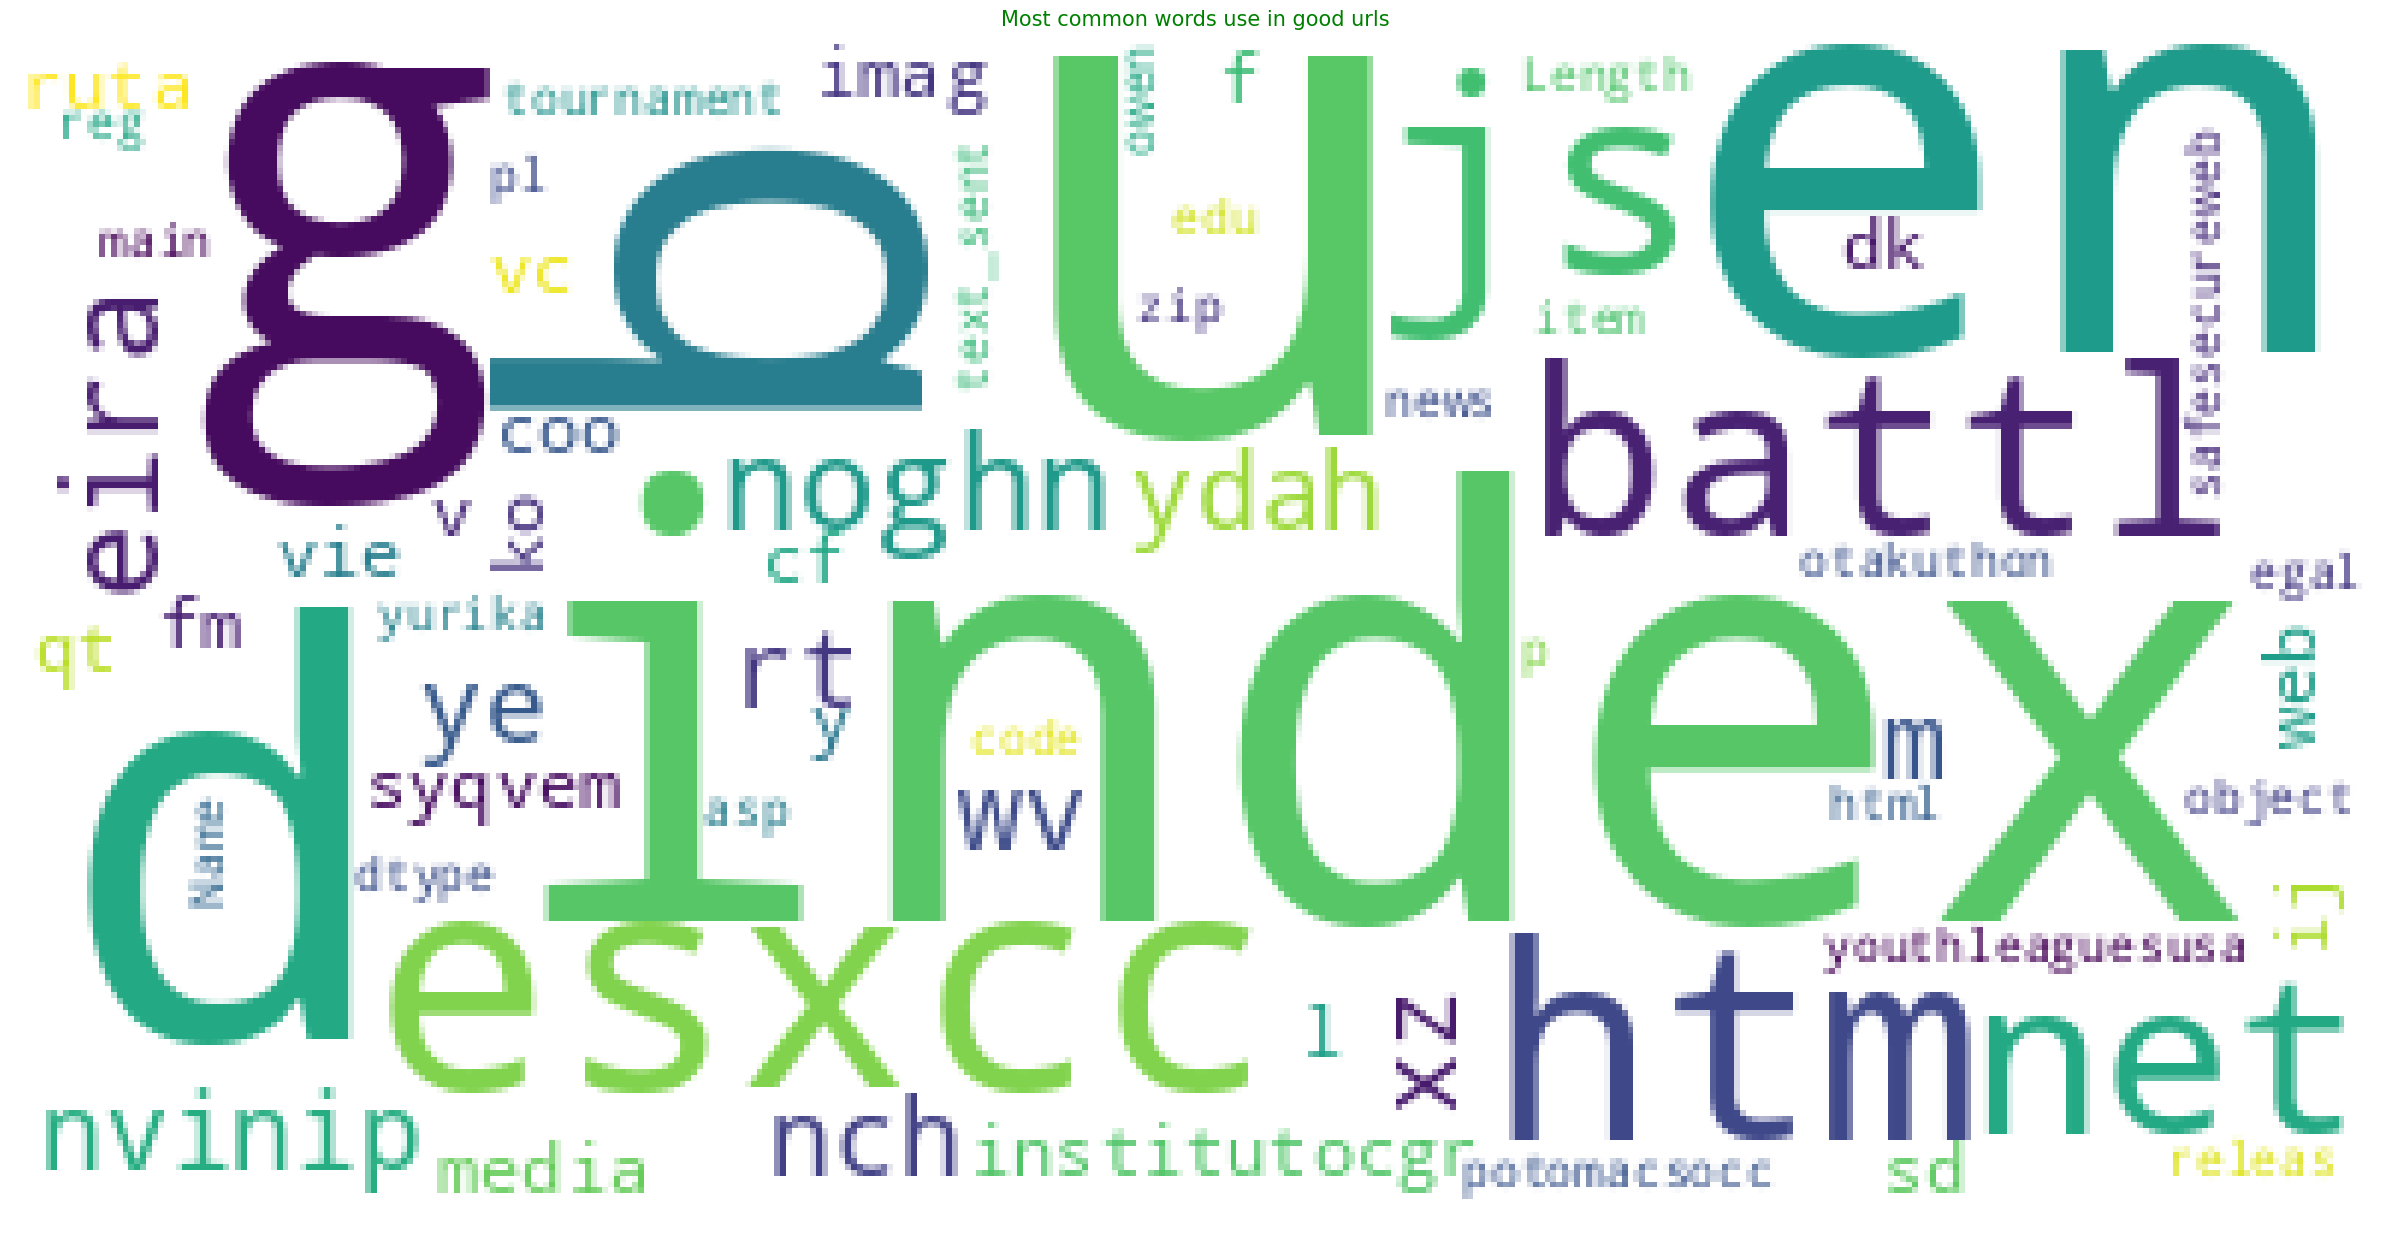

In [30]:
common_text = str(data)
plot_wordcloud(common_text,  max_words=400, max_font_size=120,
               title = 'Most common words use in good urls', title_size=15)

In [31]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

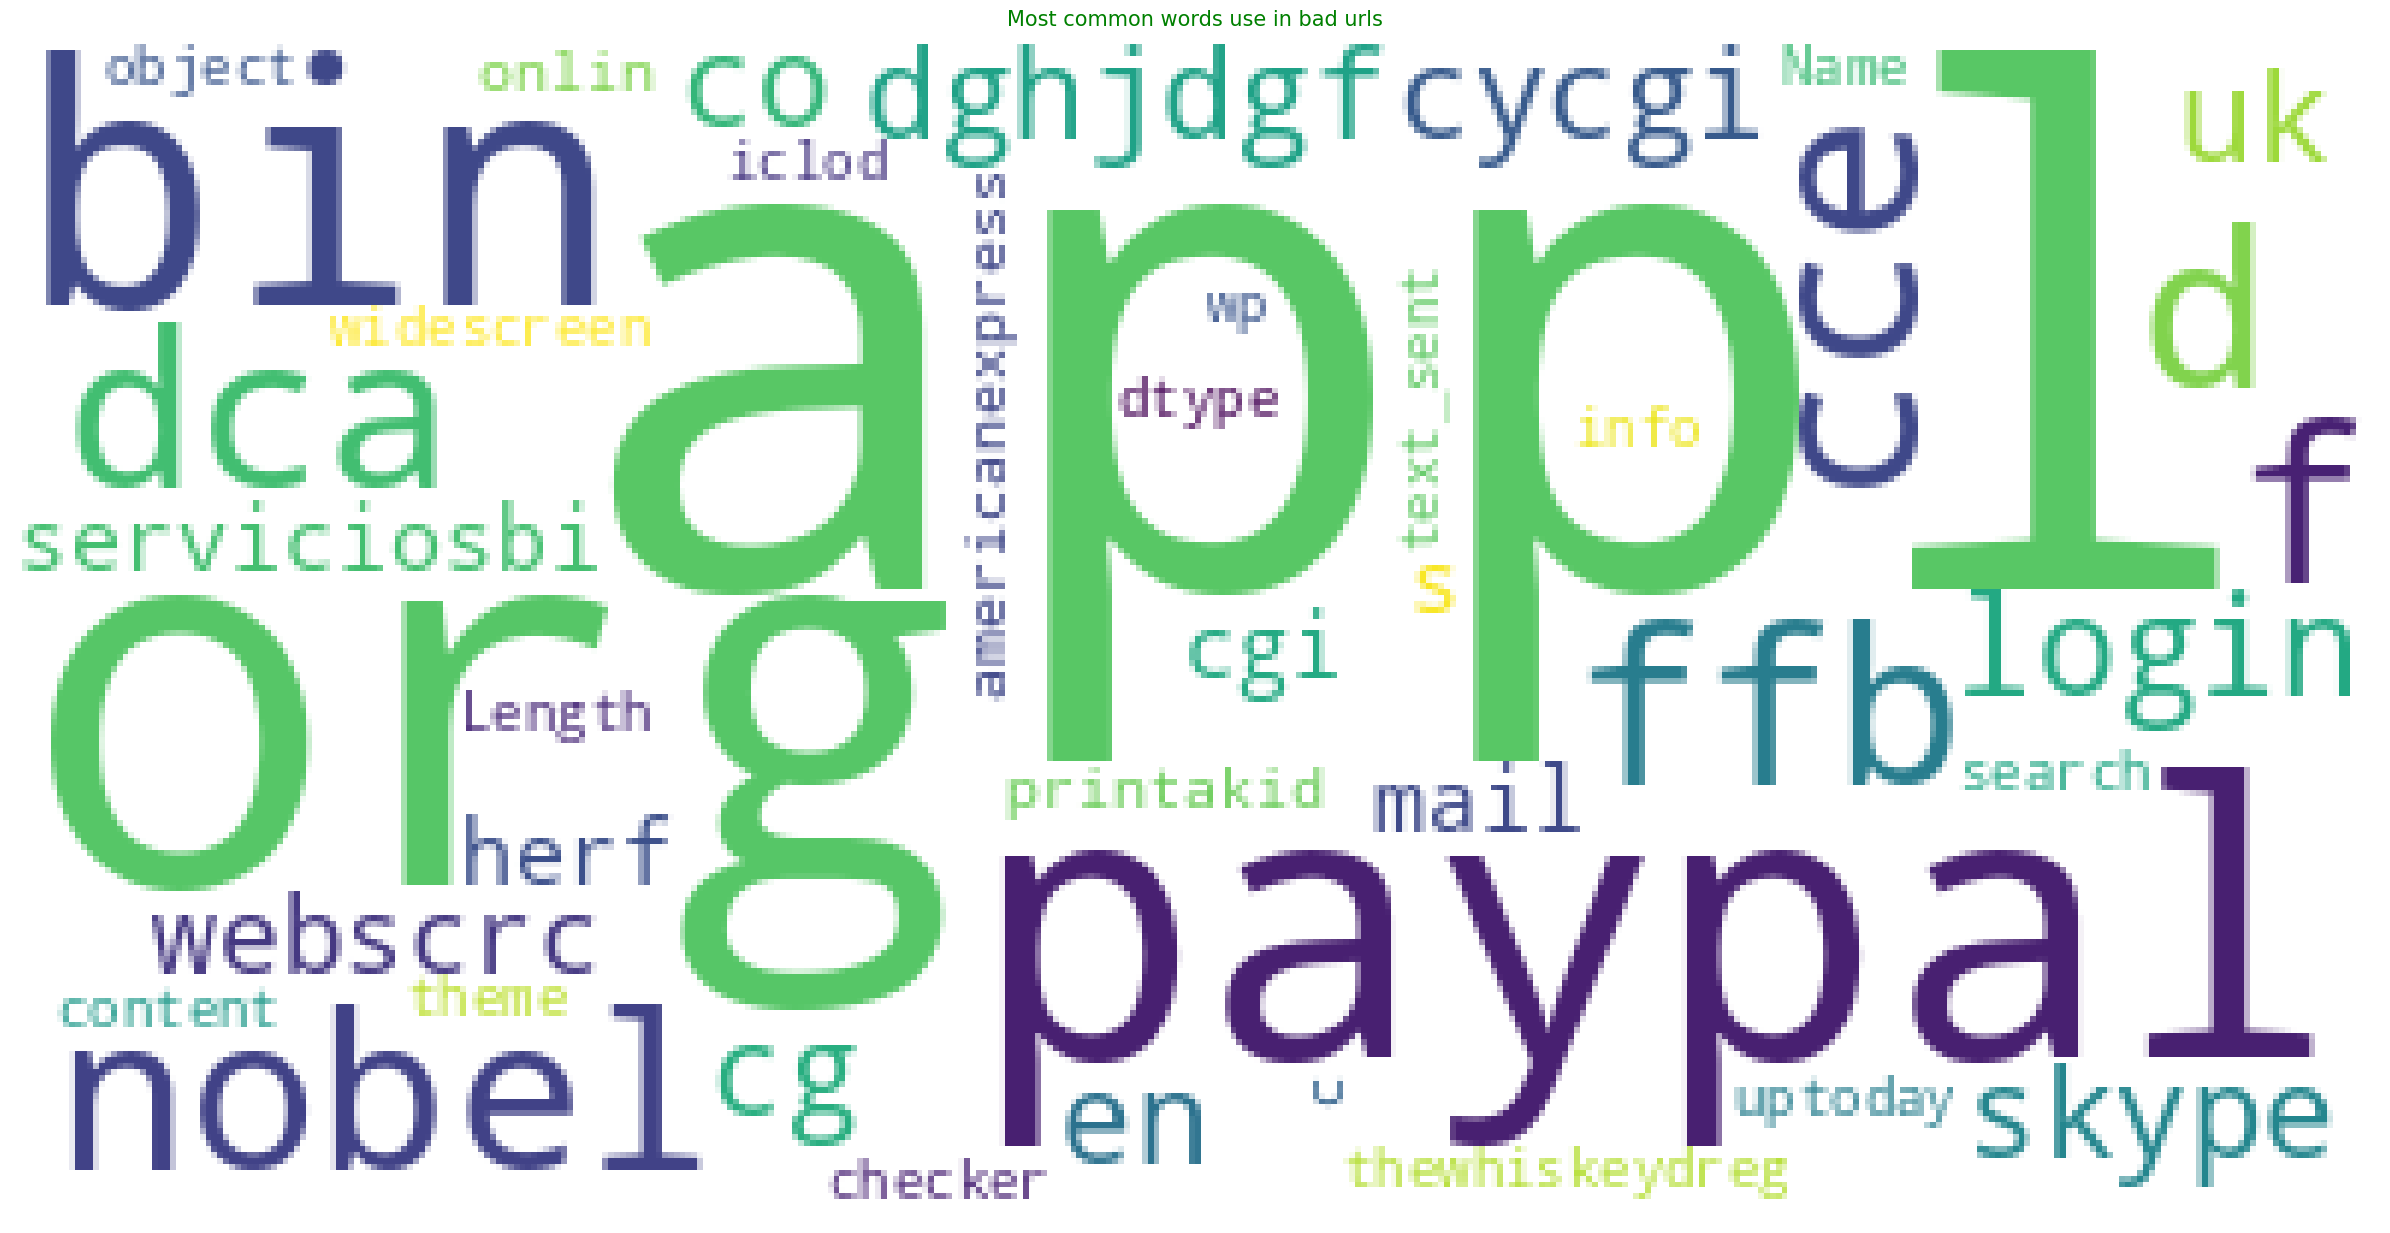

In [32]:
common_text = str(data)
plot_wordcloud(common_text,  max_words=400, max_font_size=120,
               title = 'Most common words use in bad urls', title_size=15)


# **CountVectorizer**
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes

In [34]:
#create cv object
cv = CountVectorizer()

In [35]:
 feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed


In [36]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Spliting the data**

In [37]:
from sklearn.model_selection import train_test_split # spliting the data between feature and target

In [38]:
X_train, X_test, y_train, y_test = train_test_split(feature, phish_data.Label)


# **LogisticRegression**

In [39]:
from sklearn.linear_model import LogisticRegression # algo use to predict good or bad

In [40]:
# create lr object
lr = LogisticRegression()

In [41]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [42]:
lr.score(X_train,y_train)

0.9784470727581194

In [43]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(X_test,y_test),2)

In [44]:
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict

Training Accuracy : 0.9642776527811151
Testing Accuracy : 0.9642776527811151

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36701
        Good       0.99      0.96      0.98    100636

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

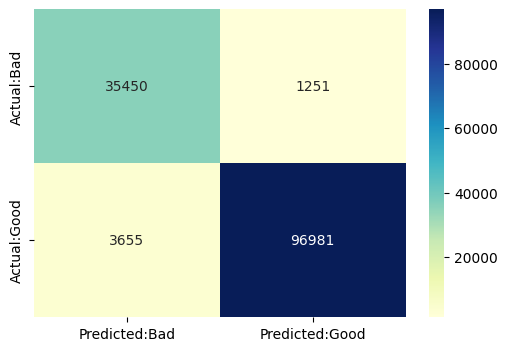

In [45]:
print('Training Accuracy :',lr.score(X_test,y_test))
print('Testing Accuracy :',lr.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(X_test),y_test),
columns = ['Predicted:Bad', 'Predicted:Good'],
index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# **MultinomialNB**

In [46]:
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad


In [47]:
# create mnb object
mnb = MultinomialNB()

In [48]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [49]:
lr.score(X_train,y_train)

0.9784470727581194

In [50]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(X_test,y_test),2)

Training Accuracy : 0.9586491622796479
Testing Accuracy : 0.9586491622796479

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     38230
        Good       0.98      0.97      0.97     99107

    accuracy                           0.96    137337
   macro avg       0.95      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

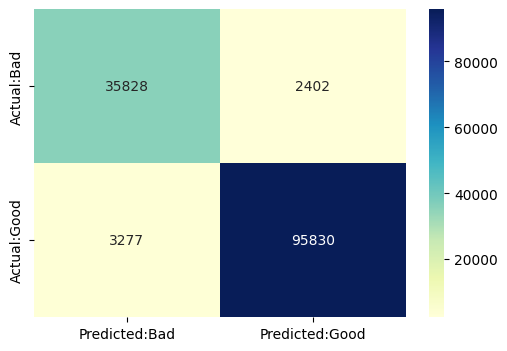

In [51]:
print('Training Accuracy :',mnb.score(X_test,y_test))
print('Testing Accuracy :',mnb.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(X_test),y_test),
columns = ['Predicted:Bad', 'Predicted:Good'],
index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [52]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])


# **So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [53]:
 pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray

In [55]:
X_train, X_test, y_train, y_test = train_test_split(phish_data.URL, phish_data.Label)

In [56]:
pipeline_ls.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

Training Accuracy : 0.980381496520707
Testing Accuracy : 0.965988772144433

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     37047
        Good       0.99      0.97      0.98    100290

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

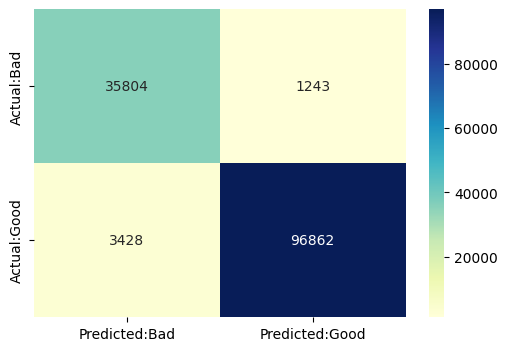

In [58]:
print('Training Accuracy :',pipeline_ls.score(X_train,y_train))
print('Testing Accuracy :',pipeline_ls.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


# **Model Dumb into a pickle file for deployment**

In [60]:
import pickle

In [61]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))


In [63]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.965988772144433


**That’s it. See, it's that simple yet so effective. We get an accuracy of 98%. That’s a very high value for a machine to be able to detect a malicious URL with. Want to test some links to see if the model gives good predictions? Sure. Let's do it**

* Bad links => this are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
fazan-pacir.rs/temp/libraries/ipad
www.tubemoviez.exe
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html

In [ ]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)